<a href="https://colab.research.google.com/github/gc2321/3235-Machine-Learning/blob/main/lung/lung_chromatin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of Human Lung Cancer Cell lines using Chromatin Profiling**

## **Introduction**

Lung cancer is broadly classified into two primary types: small cell lung cancer (SCLC) and non-small cell lung cancer (NSCLC).

SCLC typically originates in the bronchi, proliferating rapidly and swiftly metastasizing to areas like the lymph nodes. Accounting for less than 20% of lung cancer cases, SCLC strongly correlates with tobacco smoking. It is highly aggressive and frequently metastasizes, with only about a quarter of patients achieving remission.

NSCLC constitutes 80-90% of lung cancer diagnoses and tends to progress more gradually. Often asymptomatic initially, NSCLC develops slowly, leading to delayed detection; approximately 75% of cases are diagnosed at advanced stages. Surgery is a feasible option for early-stage patients, while those in later stages typically undergo chemotherapy and radiation therapy.

In this study, I compare chromatin modification profiles (Depmap Portal, depmap.org) of SCLC and NSCLC. This set comprise 112 NSCLC and 48 SCLC cell lines, with a total of 160 features. I demonstrate the robust classification ability of these features, achieving an f1 score as >0.9 and 0.78 for Non-Small Cell Lung Cancer and Small Cell Lung Cancer, respectively, when deploying Voting Classification with Logistic Regression and RandomForest Classification.

This work shows distinct chromatin modification profiles in SCLC and NSCLC. Further study is needed to ascertain whether these difference play critical roles in the mechanisms of these diseases.


In [155]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)

## **Load Data and Preprocess Data**

In [156]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [157]:
import fileinput
filePath ="/content/gdrive/MyDrive/lung/lung_chromatin.csv"

In [158]:
import pandas as pd
data = pd.read_csv(filePath)

In [159]:
data.head(3)

,depmap_id,cell_line_display_name,lineage_1,lineage_2,lineage_3,lineage_5,lineage_6,lineage_4,H3K4me0,H3K4me1,...,H3K27ac1K36me0,H3K27ac1K36me1,H3K27ac1K36me2,H3K27ac1K36me3,H3.3K27me0K36me0,H3K56me0,H3K56me1,H3K79me0,H3K79me1,H3K79me2
0,ACH-000382,CORL24,Lung,Lung Neuroendocrine Tumor,Small Cell Lung Cancer,NaN,NaN,NaN,0.256026,0.564636,...,-1.712248,-1.097775,-1.392350,-2.394747,-0.419889,-0.001917,0.388115,-0.090630,0.564439,1.162157
1,ACH-000187,CORL311,Lung,Lung Neuroendocrine Tumor,Small Cell Lung Cancer,NaN,NaN,NaN,0.319412,0.427264,...,0.996379,1.502162,0.794084,0.884487,0.592411,-0.107763,0.165048,0.283863,0.100700,0.417915
2,ACH-000695,CORL47,Lung,Lung Neuroendocrine Tumor,Small Cell Lung Cancer,NaN,NaN,NaN,0.151644,0.068741,...,0.702651,2.028062,1.732212,0.596686,-0.532791,0.060770,-0.601200,0.032399,-0.084822,-0.477969


In [160]:
data['lineage'] = np.where(data['lineage_2'].str.contains('Non-small', case=False), 'Non-Small Cell', 'Small Cell')

In [161]:
data['lineage'].value_counts()

lineage
Non-Small Cell    112
Small Cell         48
Name: count, dtype: int64

In [162]:
columns_to_remove = ['depmap_id', 'cell_line_display_name', 'lineage_1', 'lineage_2', 'lineage_3', 'lineage_5', 'lineage_6', 'lineage_4']
data = data.drop(columns=columns_to_remove)

In [163]:
data.head(2)

,H3K4me0,H3K4me1,H3K4me2,H3K4ac1,H3K9me0K14ac0,H3K9me1K14ac0,H3K9me2K14ac0,H3K9me3K14ac0,H3K9ac1K14ac0,H3K9me0K14ac1,...,H3K27ac1K36me1,H3K27ac1K36me2,H3K27ac1K36me3,H3.3K27me0K36me0,H3K56me0,H3K56me1,H3K79me0,H3K79me1,H3K79me2,lineage
0,0.256026,0.564636,0.448906,0.096119,0.921273,-0.443184,-1.107441,0.130764,0.61093,1.210030,...,-1.097775,-1.392350,-2.394747,-0.419889,-0.001917,0.388115,-0.090630,0.564439,1.162157,Small Cell
1,0.319412,0.427264,-0.221406,0.536809,-0.309614,-0.236500,-0.157305,-1.200022,1.06126,0.665113,...,1.502162,0.794084,0.884487,0.592411,-0.107763,0.165048,0.283863,0.100700,0.417915,Small Cell


In [164]:
data.isnull().sum(axis=0)


H3K4me0              0
H3K4me1              0
H3K4me2              0
H3K4ac1             16
H3K9me0K14ac0        0
H3K9me1K14ac0        0
H3K9me2K14ac0        1
H3K9me3K14ac0        1
H3K9ac1K14ac0        1
H3K9me0K14ac1        0
H3K9me1K14ac1        0
H3K9me2K14ac1        1
H3K9me3K14ac1        0
H3K9ac1K14ac1        0
H3K18ac0K23ac0       0
H3K18ac1K23ac0       0
H3K18ac0K23ac1       0
H3K18ac1K23ac1       0
H3K18ac0K23ub1      80
H3K27me0K36me0       0
H3K27me0K36me1       1
H3K27me0K36me2       1
H3K27me0K36me3       1
H3K27me1K36me0       1
H3K27me1K36me1       1
H3K27me1K36me2       0
H3K27me1K36me3       0
H3K27me2K36me0       1
H3K27me2K36me1       1
H3K27me2K36me2       0
H3K27me3K36me0       1
H3K27me3K36me1       1
H3K27ac1K36me0       4
H3K27ac1K36me1       5
H3K27ac1K36me2       4
H3K27ac1K36me3       2
H3.3K27me0K36me0     1
H3K56me0             0
H3K56me1            78
H3K79me0             0
H3K79me1             3
H3K79me2             2
lineage              0
dtype: int6

In [165]:
missing_values_percentage = (data.isnull().sum() / len(data)) * 100
for column, percentage in zip(data.columns, missing_values_percentage):
  if percentage > 0:
    print(f"{column},   % missing val: {percentage:.2f}%")


H3K4ac1,   % missing val: 10.00%
H3K9me2K14ac0,   % missing val: 0.62%
H3K9me3K14ac0,   % missing val: 0.62%
H3K9ac1K14ac0,   % missing val: 0.62%
H3K9me2K14ac1,   % missing val: 0.62%
H3K18ac0K23ub1,   % missing val: 50.00%
H3K27me0K36me1,   % missing val: 0.62%
H3K27me0K36me2,   % missing val: 0.62%
H3K27me0K36me3,   % missing val: 0.62%
H3K27me1K36me0,   % missing val: 0.62%
H3K27me1K36me1,   % missing val: 0.62%
H3K27me2K36me0,   % missing val: 0.62%
H3K27me2K36me1,   % missing val: 0.62%
H3K27me3K36me0,   % missing val: 0.62%
H3K27me3K36me1,   % missing val: 0.62%
H3K27ac1K36me0,   % missing val: 2.50%
H3K27ac1K36me1,   % missing val: 3.12%
H3K27ac1K36me2,   % missing val: 2.50%
H3K27ac1K36me3,   % missing val: 1.25%
H3.3K27me0K36me0,   % missing val: 0.62%
H3K56me1,   % missing val: 48.75%
H3K79me1,   % missing val: 1.88%
H3K79me2,   % missing val: 1.25%


In [166]:
data.drop(columns=['H3K18ac0K23ub1', 'H3K56me1'], inplace=True)


In [167]:
missing_values_percentage = (data.isnull().sum() / len(data)) * 100
for column, percentage in zip(data.columns, missing_values_percentage):
  if percentage > 0:
    print(f"{column},   % missing val: {percentage:.2f}%")

H3K4ac1,   % missing val: 10.00%
H3K9me2K14ac0,   % missing val: 0.62%
H3K9me3K14ac0,   % missing val: 0.62%
H3K9ac1K14ac0,   % missing val: 0.62%
H3K9me2K14ac1,   % missing val: 0.62%
H3K27me0K36me1,   % missing val: 0.62%
H3K27me0K36me2,   % missing val: 0.62%
H3K27me0K36me3,   % missing val: 0.62%
H3K27me1K36me0,   % missing val: 0.62%
H3K27me1K36me1,   % missing val: 0.62%
H3K27me2K36me0,   % missing val: 0.62%
H3K27me2K36me1,   % missing val: 0.62%
H3K27me3K36me0,   % missing val: 0.62%
H3K27me3K36me1,   % missing val: 0.62%
H3K27ac1K36me0,   % missing val: 2.50%
H3K27ac1K36me1,   % missing val: 3.12%
H3K27ac1K36me2,   % missing val: 2.50%
H3K27ac1K36me3,   % missing val: 1.25%
H3.3K27me0K36me0,   % missing val: 0.62%
H3K79me1,   % missing val: 1.88%
H3K79me2,   % missing val: 1.25%


In [168]:
# fill in missing val with the average of each column
for column in data.columns:
  if data[column].isnull().any():
    data[column] = data[column].fillna(np.nanmean(data[column]))


In [169]:
data.isnull().sum(axis=0)

H3K4me0             0
H3K4me1             0
H3K4me2             0
H3K4ac1             0
H3K9me0K14ac0       0
H3K9me1K14ac0       0
H3K9me2K14ac0       0
H3K9me3K14ac0       0
H3K9ac1K14ac0       0
H3K9me0K14ac1       0
H3K9me1K14ac1       0
H3K9me2K14ac1       0
H3K9me3K14ac1       0
H3K9ac1K14ac1       0
H3K18ac0K23ac0      0
H3K18ac1K23ac0      0
H3K18ac0K23ac1      0
H3K18ac1K23ac1      0
H3K27me0K36me0      0
H3K27me0K36me1      0
H3K27me0K36me2      0
H3K27me0K36me3      0
H3K27me1K36me0      0
H3K27me1K36me1      0
H3K27me1K36me2      0
H3K27me1K36me3      0
H3K27me2K36me0      0
H3K27me2K36me1      0
H3K27me2K36me2      0
H3K27me3K36me0      0
H3K27me3K36me1      0
H3K27ac1K36me0      0
H3K27ac1K36me1      0
H3K27ac1K36me2      0
H3K27ac1K36me3      0
H3.3K27me0K36me0    0
H3K56me0            0
H3K79me0            0
H3K79me1            0
H3K79me2            0
lineage             0
dtype: int64

In [170]:
y = data.iloc[:, -1]
X = data.iloc[:, :-1]

In [171]:
X.shape

(160, 40)

## **Clustering by KMeans**

To assess if the current features are sufficient allow the segregation of cluster same type of cells together, I perform cluster analysis using KMeans. I expect there will be two clusters: Non-Small Cell Cancer cells and Small Cell Cancer cells.

In [172]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

inertias_1 = []
silhouette_avgs = []
max_K = 5
for k in np.arange(1,max_K+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertias_1 = inertias_1 + [kmeans.inertia_]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X, kmeans.labels_)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

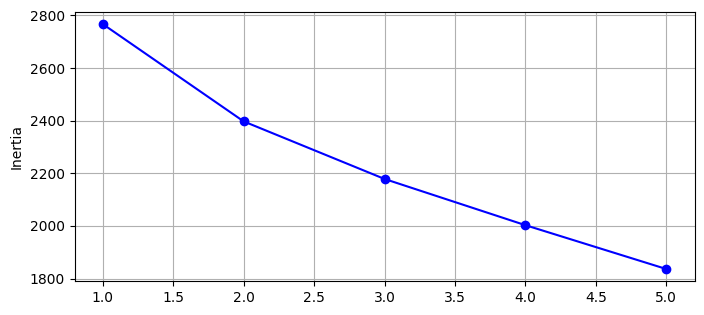

In [173]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 6), inertias_1, "bo-")
plt.xlabel("")
plt.ylabel("Inertia")
plt.grid()
plt.show()

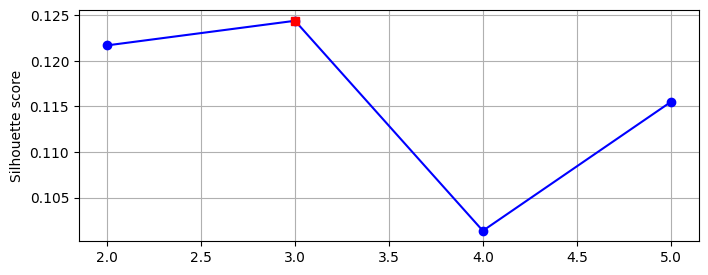

In [174]:
plt.figure(figsize=(8, 3))

k_range = range(2, 6)
best_index = np.argmax(silhouette_avgs)
best_k = k_range[best_index]
best_score = silhouette_avgs[best_index]

plt.plot(k_range, silhouette_avgs, "bo-")
plt.xlabel("")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

Optimial cluster seems to be 3 clusters using these data, the Silhouette Score for 2 clusters and 2 clusters are very similar. I will proceed to cluster with two clusters.

In [175]:
# using 2 clusters using all of the data
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [176]:
cluster_labels = kmeans.labels_

# Initialize dictionaries to store indices of data points belonging to each cluster
cluster_indices = {}
for i in range(2):  # Assuming 2 clusters
    cluster_indices[i] = []

for i, label in enumerate(cluster_labels):
    cluster_indices[label].append(y[i])


In [177]:
from collections import Counter

for key, value in cluster_indices.items():
    freq = Counter(value)
    print(key, ':', freq)


0 : Counter({'Non-Small Cell': 65, 'Small Cell': 17})
1 : Counter({'Non-Small Cell': 47, 'Small Cell': 31})


In [178]:
# using PCA to visualize the two clusters

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
labels = kmeans.labels_

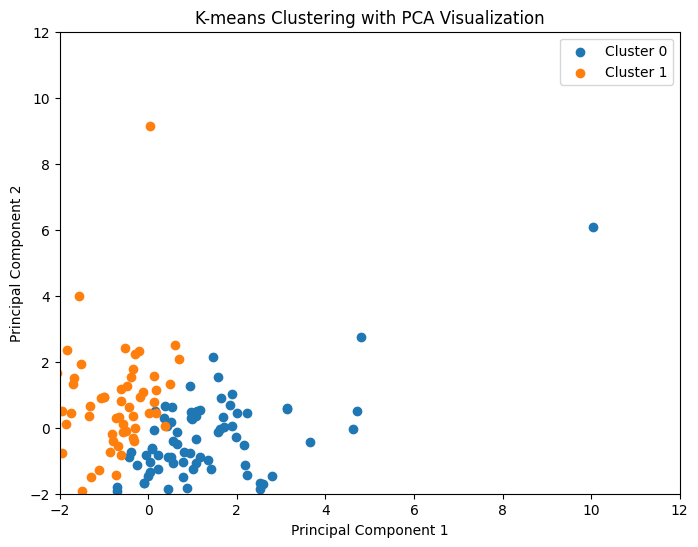

In [179]:

plt.figure(figsize=(8, 6))
x_range = (-2, 12)
y_range = (-2, 12)

for cluster_label in np.unique(labels):
    plt.scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1], label=f'Cluster {cluster_label}')

plt.title('K-means Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim(x_range)
plt.ylim(y_range)
plt.legend()
plt.show()

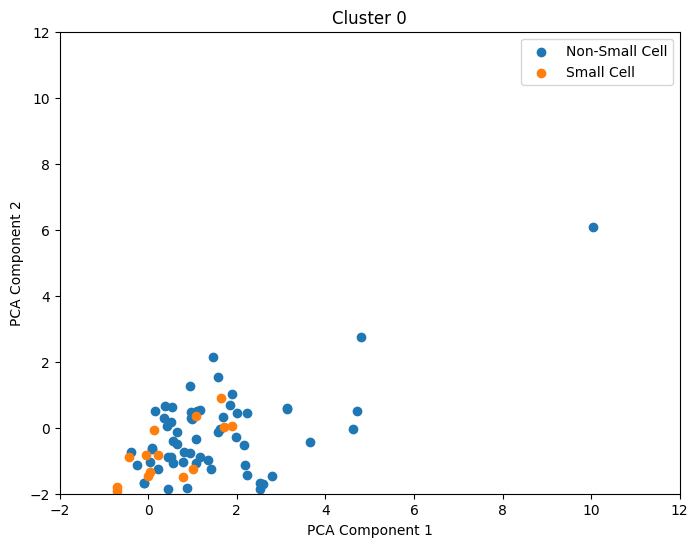

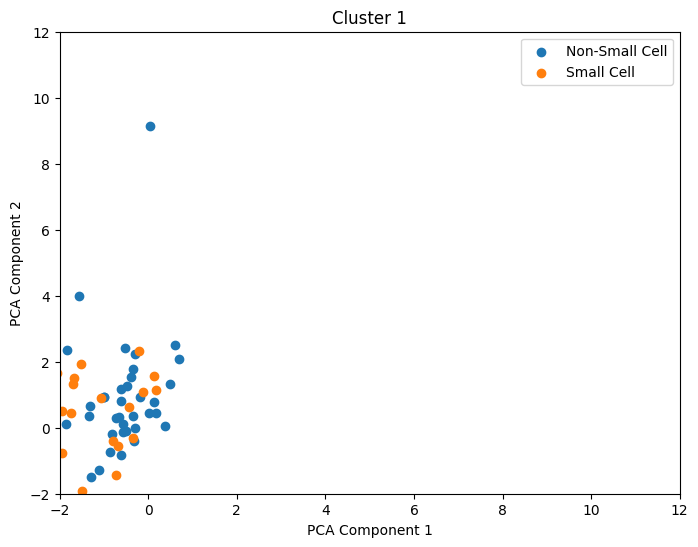

In [180]:
x_range = (-2, 12)
y_range = (-2, 12)

unique_labels = np.unique(kmeans.labels_)

for label in unique_labels:
    plt.figure(figsize=(8, 6))
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'Cluster {label}')

    indices = np.where(kmeans.labels_ == label)

    for class_label in np.unique(data['lineage']):
        class_indices = np.where(data['lineage'].values[indices] == class_label)
        plt.scatter(X_pca[indices][class_indices, 0], X_pca[indices][class_indices, 1], label=f'{class_label}')
        print()

    plt.legend()
    plt.show()


Conclusion: Using KMean Clustering, there are optimually 2 - 3 clusters as assess by the Silhouette Score. Cluster 0 is predominantly Non-Small Cells, cluster 1 is a mixture of Non-Small Cell and Small Cell Lung Cancer.

## **Classification**

I will use three difference approaches to try to classify Lung Cancer Cells with the aforementioned features. I will compare performance of Logistic Regression, SVC, and RandomForest Classifier. For each approach, I will determine the optimal parameters by grid_search.

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   H3K4me0           160 non-null    float64
 1   H3K4me1           160 non-null    float64
 2   H3K4me2           160 non-null    float64
 3   H3K4ac1           160 non-null    float64
 4   H3K9me0K14ac0     160 non-null    float64
 5   H3K9me1K14ac0     160 non-null    float64
 6   H3K9me2K14ac0     160 non-null    float64
 7   H3K9me3K14ac0     160 non-null    float64
 8   H3K9ac1K14ac0     160 non-null    float64
 9   H3K9me0K14ac1     160 non-null    float64
 10  H3K9me1K14ac1     160 non-null    float64
 11  H3K9me2K14ac1     160 non-null    float64
 12  H3K9me3K14ac1     160 non-null    float64
 13  H3K9ac1K14ac1     160 non-null    float64
 14  H3K18ac0K23ac0    160 non-null    float64
 15  H3K18ac1K23ac0    160 non-null    float64
 16  H3K18ac0K23ac1    160 non-null    float64
 1

In [182]:
# Check if any cell contains NaN
any_nan = data.isna().any().any()
any_nan

False

In [183]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [185]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.utils.class_weight import compute_class_weight

cv = 5

## **Logistic Regression**

In [187]:
from sklearn.linear_model import LogisticRegression

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

log_reg = LogisticRegression(class_weight=dict(zip(np.unique(y_train), class_weights)), max_iter=5000)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.05, 0.1],
    'solver': ['liblinear', 'saga']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={'Non-Small Cell': 0.7111111111111111,
                                                        'Small Cell': 1.6842105263157894},
                                          max_iter=5000),
             param_grid={'C': [0.001, 0.01, 0.05, 0.1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [188]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
log_best_model = grid_search.best_estimator_
cv_scores = cross_val_score(log_best_model, X_train, y_train, cv=cv)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Hyperparameters: {'C': 0.05, 'penalty': 'l2', 'solver': 'saga'}
Mean Cross-Validation Score: 0.759076923076923


In [189]:
y_pred = log_best_model.predict(X_test)

In [190]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[20,  2],
       [ 3,  7]])

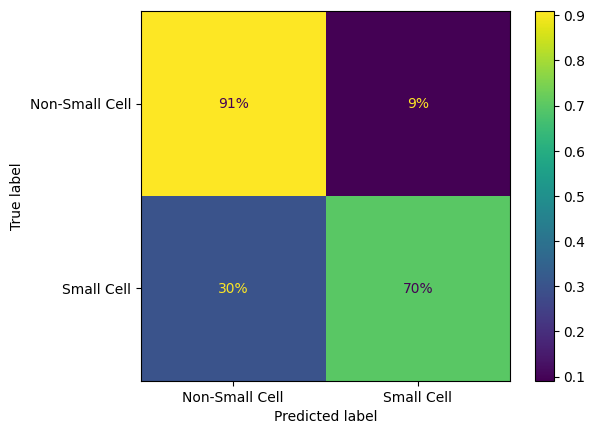

In [191]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")

In [192]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Non-Small Cell       0.87      0.91      0.89        22
    Small Cell       0.78      0.70      0.74        10

      accuracy                           0.84        32
     macro avg       0.82      0.80      0.81        32
  weighted avg       0.84      0.84      0.84        32



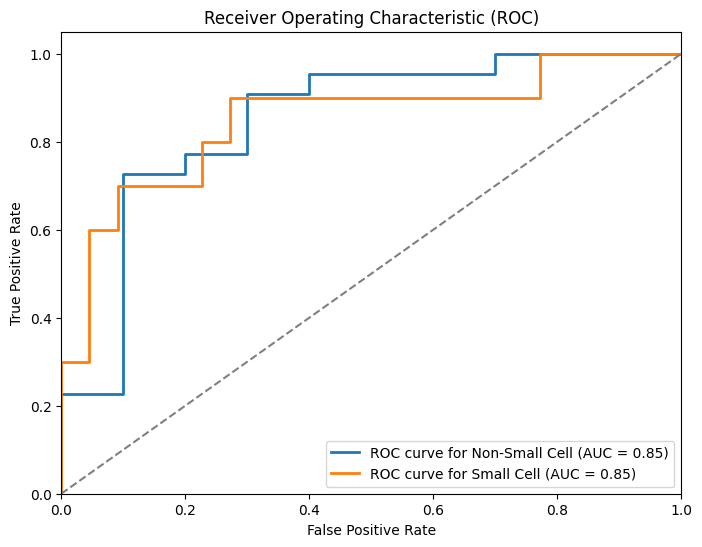

In [193]:
from sklearn.metrics import roc_curve, auc

## auc
y_prob = log_best_model.predict_proba(X_test)

class_labels = ['Non-Small Cell', 'Small Cell']

fpr = {}
tpr = {}
roc_auc = {}

for i, label in enumerate(class_labels):
    y_true = (y_test == label)
    y_score = y_prob[:, i]
    fpr[label], tpr[label], _ = roc_curve(y_true, y_score)
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(8, 6))
for label in class_labels:
    plt.plot(fpr[label], tpr[label], lw=2, label='ROC curve for {} (AUC = {:.2f})'.format(label, roc_auc[label]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## **SVC**

In [194]:
from sklearn.svm import SVC

svc = SVC(class_weight='balanced', probability=True)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
}

grid_search = GridSearchCV(svc, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [195]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

svc_best_model = grid_search.best_estimator_
cv_scores = cross_val_score(svc_best_model, X_train, y_train, cv=cv)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Hyperparameters: {'C': 0.1, 'gamma': 0.01}
Mean Cross-Validation Score: 0.7584615384615384


In [196]:
y_pred = svc_best_model.predict(X_test)

In [197]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  3],
       [ 5,  5]])

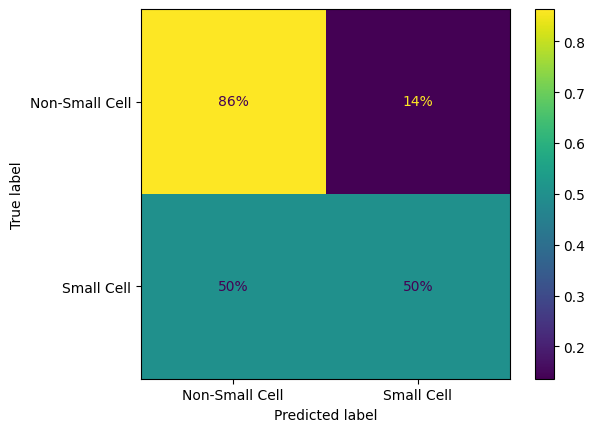

In [198]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")

In [199]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Non-Small Cell       0.79      0.86      0.83        22
    Small Cell       0.62      0.50      0.56        10

      accuracy                           0.75        32
     macro avg       0.71      0.68      0.69        32
  weighted avg       0.74      0.75      0.74        32



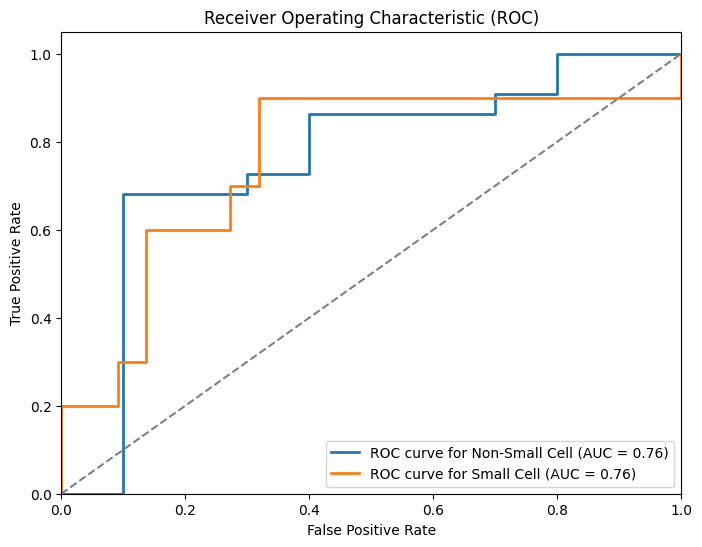

In [200]:
## auc

y_prob = svc_best_model.predict_proba(X_test)

class_labels = ['Non-Small Cell', 'Small Cell']

fpr = {}
tpr = {}
roc_auc = {}

for i, label in enumerate(class_labels):
    y_true = (y_test == label)
    y_score = y_prob[:, i]
    fpr[label], tpr[label], _ = roc_curve(y_true, y_score)
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(8, 6))
for label in class_labels:
    plt.plot(fpr[label], tpr[label], lw=2, label='ROC curve for {} (AUC = {:.2f})'.format(label, roc_auc[label]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## **RandomForest**

In [201]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [300, 500, 800],  # Number of trees in the forest
    'max_depth': [None, 10, 20],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 4, 8],     # Minimum number of samples required at each leaf node
}

# Perform grid search cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [300, 500, 800]},
             scoring='accuracy')

In [202]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

rf_best_model = grid_search.best_estimator_
cv_scores = cross_val_score(rf_best_model, X_train, y_train, cv=cv)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Mean Cross-Validation Score: 0.8138461538461538


In [203]:
y_pred = rf_best_model.predict(X_test)

In [204]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  3],
       [ 7,  3]])

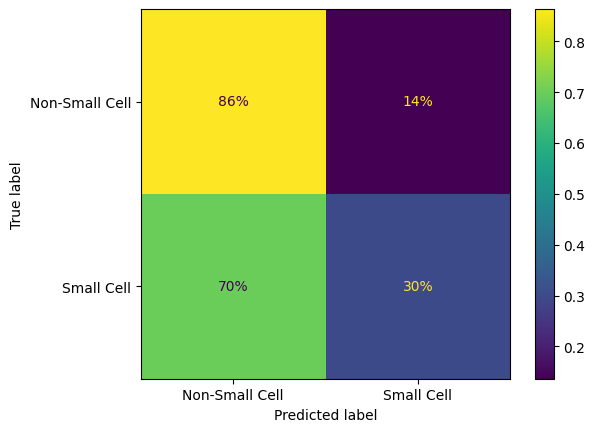

In [205]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")

In [206]:
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Non-Small Cell       0.73      0.86      0.79        22
    Small Cell       0.50      0.30      0.37        10

      accuracy                           0.69        32
     macro avg       0.62      0.58      0.58        32
  weighted avg       0.66      0.69      0.66        32



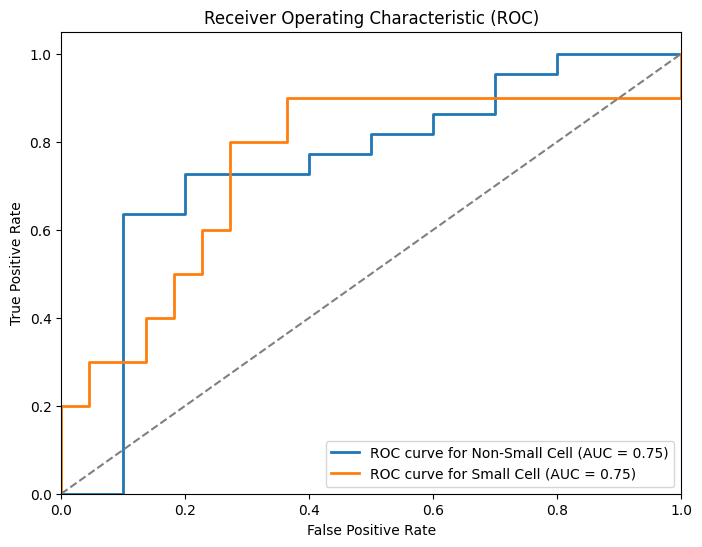

In [207]:
## auc

y_prob = rf_best_model.predict_proba(X_test)

class_labels = ['Non-Small Cell', 'Small Cell']

fpr = {}
tpr = {}
roc_auc = {}

for i, label in enumerate(class_labels):
    y_true = (y_test == label)
    y_score = y_prob[:, i]
    fpr[label], tpr[label], _ = roc_curve(y_true, y_score)
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(8, 6))
for label in class_labels:
    plt.plot(fpr[label], tpr[label], lw=2, label='ROC curve for {} (AUC = {:.2f})'.format(label, roc_auc[label]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

I chose three different approaches, Logistic Regression, RandomForest, and SVC.,the best approach seems to be Logistic Regression, with F1 score for Non-Small Cell and Small Cell 0.89 and 0.78, respectively.

I use Voting Classifier to see if performance can be improved.

## Voting Classifier

In [208]:
from sklearn.base import clone

log_model = LogisticRegression(class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [209]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lr', log_model), ('rf', rf_model)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

In [210]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[21,  1],
       [ 3,  7]])

In [211]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Non-Small Cell       0.88      0.95      0.91        22
    Small Cell       0.88      0.70      0.78        10

      accuracy                           0.88        32
     macro avg       0.88      0.83      0.85        32
  weighted avg       0.88      0.88      0.87        32



Using Voting Classifier marginally improve classification performance.

## **Analysis of Predictive Features**

Next, I perform deeper analysis of feature that are important for segregating the two classes of Lung Cancer Cells. First I ask how many features accounts for 90% of the prediction using the Logistic regression Model.

In [212]:
# Get top coefficients of the logisitic model
coefficients = log_best_model.coef_[0]
top_10_indices = sorted(range(len(coefficients)), key=lambda i: abs(coefficients[i]), reverse=True)[:10]

top_10_features = [data.columns[i] for i in top_10_indices]

print("Top 10 features:")
for feature in top_10_features:
    print(feature)

Top 10 features:
H3K27me3K36me0
H3K27me1K36me3
H3K4me0
H3K27me2K36me1
H3K27me0K36me2
H3K27me1K36me1
H3K27me1K36me2
H3K27me0K36me0
H3K27ac1K36me1
H3K27me0K36me1


In [213]:
# How many features accounts for 90% of prediction?

abs_coefficients = sorted(abs(coefficients), reverse=True)

# Calculate the cumulative importance
total_importance = sum(abs_coefficients)
cumulative_importance = 0
num_features = 0

for importance in abs_coefficients:
    cumulative_importance += importance
    num_features += 1
    if cumulative_importance >= 0.9 * total_importance:
        break

print(f"Of the 160 features, number of features accounting for 90% of the prediction: {num_features}")


Of the 160 features, number of features accounting for 90% of the prediction: 28


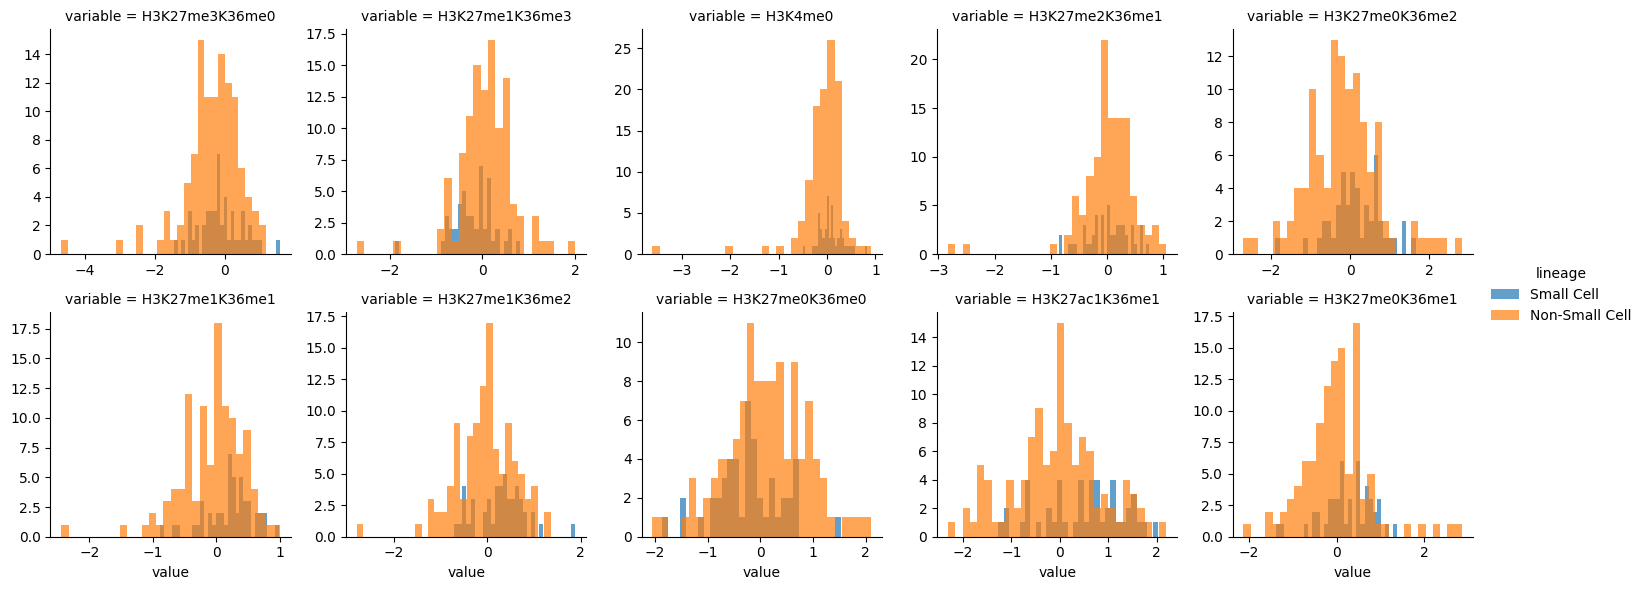

In [214]:
import seaborn as sns

# Select top 10 features
top_10_indices = sorted(range(len(coefficients)), key=lambda i: abs(coefficients[i]), reverse=True)[:10]
top_10_features = [data.columns[i] for i in top_10_indices]

data_melted = pd.melt(data, id_vars='lineage', value_vars=top_10_features)

# Plot histograms using FacetGrid
g = sns.FacetGrid(data_melted, col='variable', hue='lineage', col_wrap=5, sharex=False, sharey=False)
g.map(plt.hist, 'value', bins=30, alpha=0.7)
g.add_legend()
plt.show()

Using the histogram for the top 10 features, the difference between Small Cell and Non-Small Cell Lung Cancer is not very obvious.

## **Conclusion**

This analysis shows it is possible to classify Human Small Cell and Non-Small Cell Lung Cancer cells using chromatin expression profiles. Interestingly, histogram of top 10 features did not show appreciable difference between these two types of cell lines. Further investigation needs to further elucidating these chromatin modification difference as they may play critical role in tumor initition and pregression.

### Addendum

I explore if neural network classification will perform better than the approaches above.

In [215]:
import sys
assert sys.version_info >= (3, 7)

In [216]:
from packaging import version
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [218]:
y_train = y_train.apply(lambda x: 0 if x == "Non-Small Cell" else 1)
y_test = y_test.apply(lambda x: 0 if x == "Non-Small Cell" else 1)

In [219]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [220]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [221]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [222]:
X_train.shape

(128, 40)

In [223]:
model = Sequential()

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=40,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy', metrics=["accuracy"])


In [224]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [225]:
model.fit(x=X_train,
          y=y_train,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
4/4 [==============================] - 1s 71ms/step - loss: 0.7843 - accuracy: 0.3594 - val_loss: 0.7078 - val_accuracy: 0.3438
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6886 - accuracy: 0.5312 - val_loss: 0.6613 - val_accuracy: 0.6562
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6686 - accuracy: 0.6172 - val_loss: 0.6433 - val_accuracy: 0.6875
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6212 - accuracy: 0.7031 - val_loss: 0.6339 - val_accuracy: 0.6875
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6204 - accuracy: 0.6562 - val_loss: 0.6261 - val_accuracy: 0.6875
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6230 - accuracy: 0.6719 - val_loss: 0.6231 - val_accuracy: 0.6875
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6415 - accuracy: 0.6406 - val_loss: 0.6216 - val_accuracy: 0.6875
Epoch 8/100
4/4 [===

<Axes: >

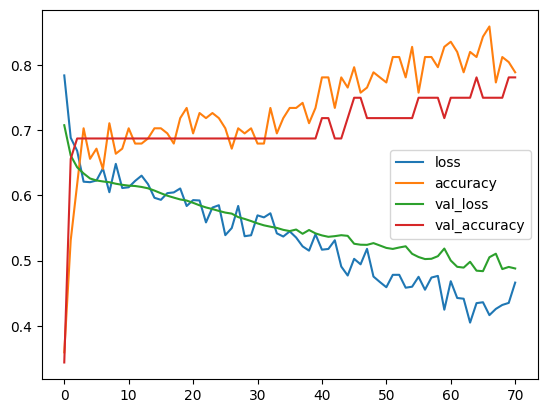

In [226]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [227]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 85ms/step


In [228]:
from sklearn.metrics import classification_report,confusion_matrix

In [229]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.71      0.50      0.59        10

    accuracy                           0.78        32
   macro avg       0.76      0.70      0.72        32
weighted avg       0.77      0.78      0.77        32



Neural Network with the current configuration does not provide any improvement in classification performance compare to Logistic Regression.